<a href="https://colab.research.google.com/github/Venkatpotla33/Machine-Learning-Lab/blob/main/ML_Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement Principal Component Analysis (PCA) and Kernel PCA (KPCA)

Task 01

*   Generate very high dimensional feature data and Apply PCA and Kernel PCA
*   Reconstruct the original data




In [ ]:
# Generate and Display High Dimensional Data
import numpy as np


np.random.seed(42)

X = np.random.randn(5000, 1000)
print(f"Original data shape: {X.shape}")
display(X)

Original data shape: (5000, 1000)


array([[ 0.49671415, -0.1382643 ,  0.64768854, ...,  0.64084286,
        -0.57117899,  0.57258278],
       [ 1.39935544,  0.92463368,  0.05963037, ..., -0.88187465,
        -0.16306696, -0.74490264],
       [-0.67517827, -0.14451867, -0.79241992, ..., -1.24176058,
         0.33417642, -0.15525905],
       ...,
       [ 0.61171674,  0.06687969,  0.54458381, ...,  1.24543629,
        -0.29889723, -0.47647249],
       [-0.1727567 ,  0.73169878,  0.3275304 , ..., -0.23985067,
        -0.89593065, -0.01129323],
       [ 0.8108943 ,  0.02895582, -0.05206183, ...,  0.63729835,
        -1.59731405, -1.8886631 ]])

In [ ]:
# Center the data
X_centered = X - X.mean(axis=0)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_centered)

print("Data has been centered and standardized.")

Data has been centered and standardized.


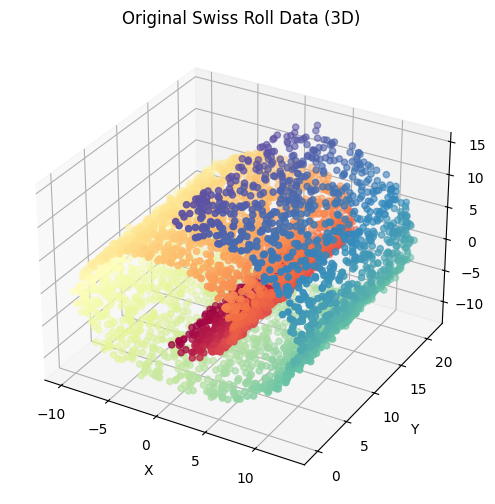

In [ ]:
# Plot the original 3D Swiss Roll data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t, cmap=plt.cm.Spectral)
ax.set_title("Original Swiss Roll Data (3D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

PCA-transformed data shape: (5000, 1000)
Reconstructed data shape: (5000, 1000)


array([[ 0.51211462, -0.12836466,  0.6558747 , ...,  0.64228375,
        -0.56676118,  0.59085186],
       [ 1.43284426,  0.93368534,  0.07116716, ..., -0.90064119,
        -0.16468243, -0.72116321],
       [-0.68326178, -0.13461404, -0.77602834, ..., -1.26530302,
         0.32521001, -0.13396789],
       ...,
       [ 0.62942178,  0.07661566,  0.55335744, ...,  1.25490051,
        -0.29850466, -0.45384761],
       [-0.170772  ,  0.74090436,  0.33754076, ..., -0.25009714,
        -0.88671191,  0.00940017],
       [ 0.83259074,  0.03872205, -0.03988864, ...,  0.63869219,
        -1.57772649, -1.86017464]])

PCA reconstruction MSE: 1.457439380976473e-29


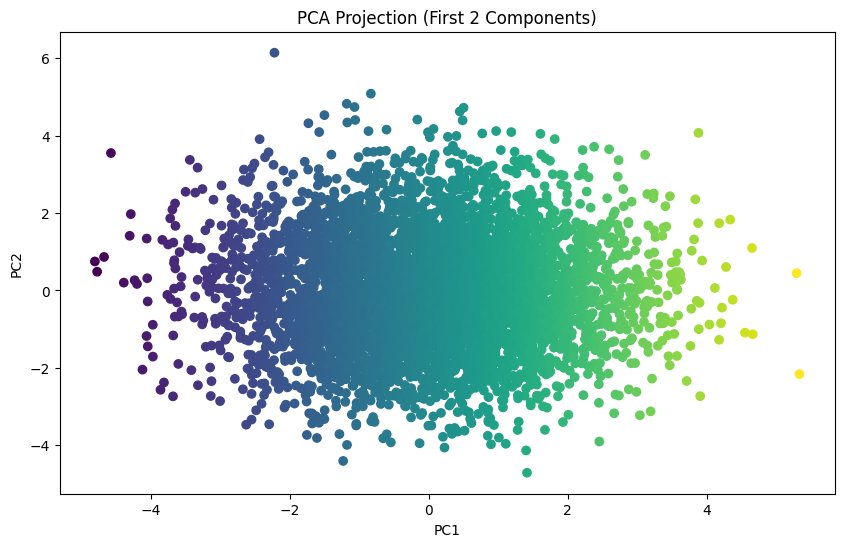

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Apply PCA with 1000 components
pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA-transformed data shape: {X_pca.shape}")

# Reconstruct the original data
X_pca_reconstructed = pca.inverse_transform(X_pca)
print(f"Reconstructed data shape: {X_pca_reconstructed.shape}")

# Display the reconstructed data
display(X_pca_reconstructed)

# Calculate the Mean Squared Error
mse_pca = mean_squared_error(X_scaled, X_pca_reconstructed)
print(f"PCA reconstruction MSE: {mse_pca}")

# Plot the first two principal components
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], cmap='viridis') # Color by the first component
    plt.title("PCA Projection (First 2 Components)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
else:
    print("Cannot plot the PCA projection as the number of components is less than 2.")

KPCA-transformed data shape: (5000, 1000)
Reconstructed data shape: (5000, 1000)


array([[ 0.00172334, -0.00062375,  0.0026376 , ...,  0.00406566,
        -0.00291448,  0.00235078],
       [ 0.00653923,  0.00464761, -0.00140277, ..., -0.00566558,
        -0.00230375, -0.00400459],
       [-0.00467273, -0.00240641, -0.00355362, ..., -0.00358782,
         0.00099829, -0.00028373],
       ...,
       [ 0.00111965, -0.00077654,  0.00225188, ...,  0.00428239,
        -0.00071567, -0.0040722 ],
       [-0.00295083,  0.0037531 ,  0.00379508, ..., -0.00106285,
        -0.00396995, -0.00033265],
       [ 0.00389728, -0.00046397, -0.00142092, ...,  0.00356391,
        -0.00785541, -0.00931353]])

KPCA reconstruction MSE: 0.9912052033522761


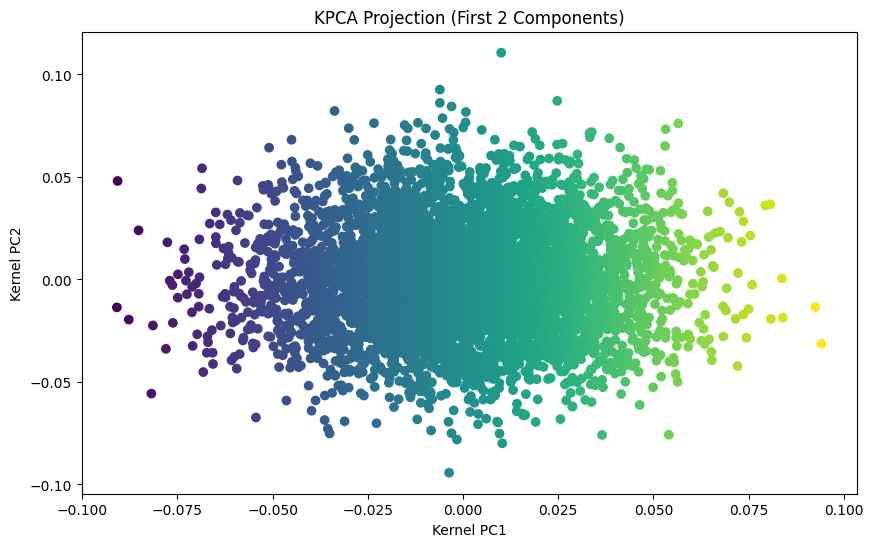

In [ ]:
from sklearn.decomposition import KernelPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Apply Kernel PCA with 1000 components
# Using an RBF kernel with a default gamma and enabling inverse transform
kpca = KernelPCA(n_components=1000, kernel="rbf", random_state=42, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_scaled)
print(f"KPCA-transformed data shape: {X_kpca.shape}")

# Reconstruct the original data
X_kpca_reconstructed = kpca.inverse_transform(X_kpca)
print(f"Reconstructed data shape: {X_kpca_reconstructed.shape}")

# Display the reconstructed data
display(X_kpca_reconstructed)

# Calculate the Mean Squared Error
mse_kpca = mean_squared_error(X_scaled, X_kpca_reconstructed)
print(f"KPCA reconstruction MSE: {mse_kpca}")

# Plot the first two kernel principal components
if X_kpca.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=X_kpca[:, 0], cmap='viridis') # Color by the first kernel component
    plt.title("KPCA Projection (First 2 Components)")
    plt.xlabel("Kernel PC1")
    plt.ylabel("Kernel PC2")
    plt.show()
else:
    print("Cannot plot the KPCA projection as the number of components is less than 2.")

Task 02

1.   Compare performance with original features and with PCA, kernel PCA reduced features




Applying PCA with 1000 components...
PCA-transformed data shape with 1000 components: (5000, 1000)
Time taken for reduction: 2.2737 seconds
PCA reconstruction MSE with 1000 components: 1.457439380976473e-29


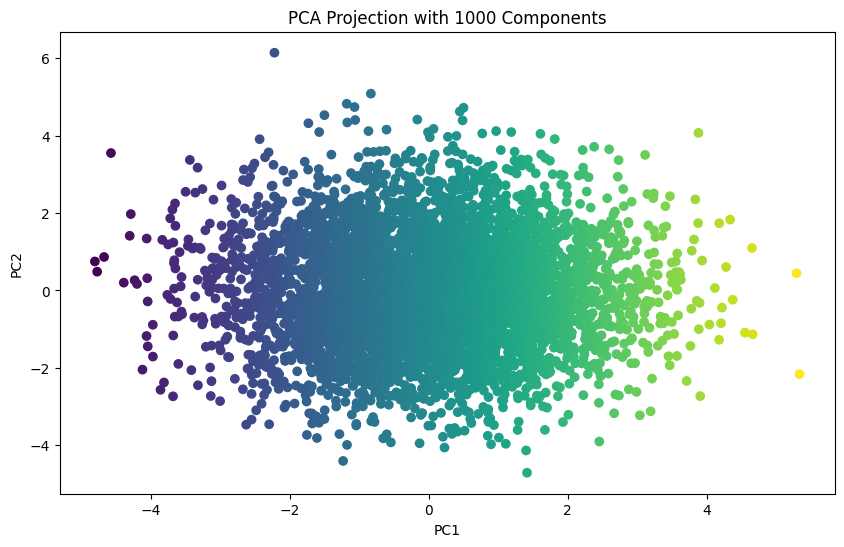


Applying PCA with 800 components...
PCA-transformed data shape with 800 components: (5000, 800)
Time taken for reduction: 2.3026 seconds
PCA reconstruction MSE with 800 components: 0.08989164232585568


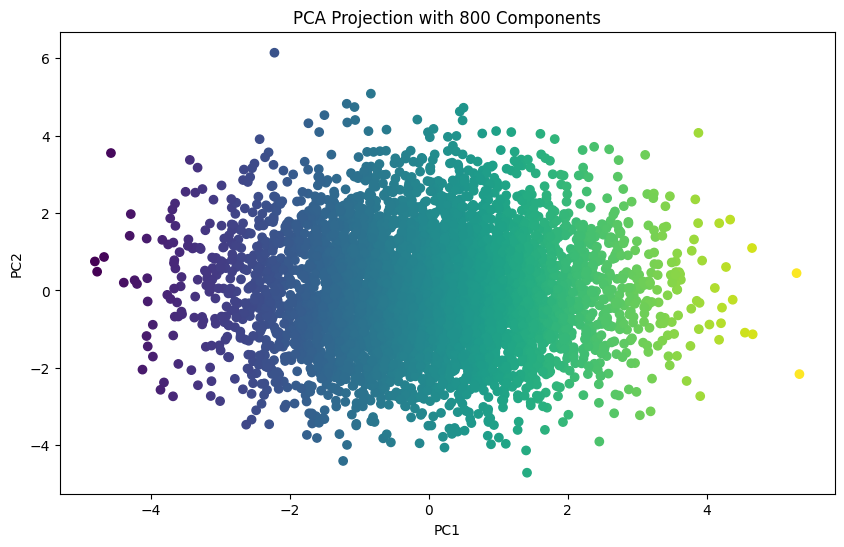


Applying PCA with 600 components...
PCA-transformed data shape with 600 components: (5000, 600)
Time taken for reduction: 6.5417 seconds
PCA reconstruction MSE with 600 components: 0.23513338065647502


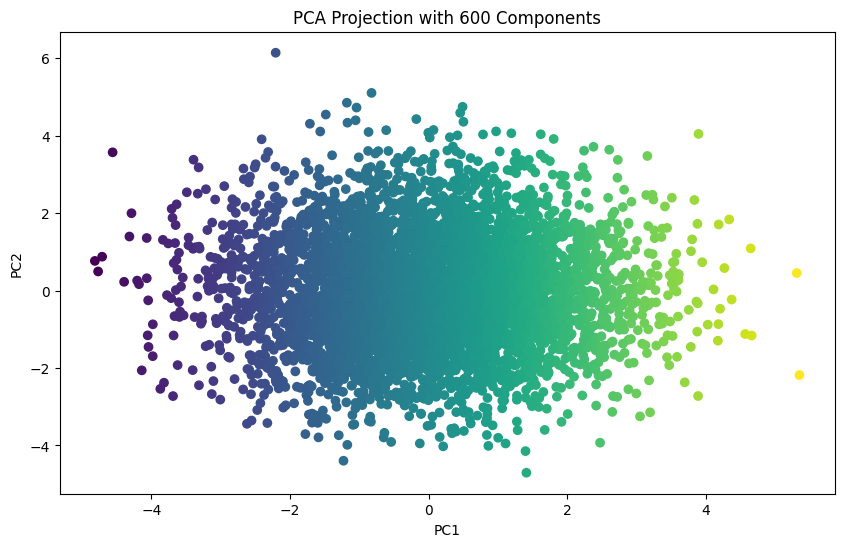


Applying PCA with 400 components...
PCA-transformed data shape with 400 components: (5000, 400)
Time taken for reduction: 3.3292 seconds
PCA reconstruction MSE with 400 components: 0.4261708024608203


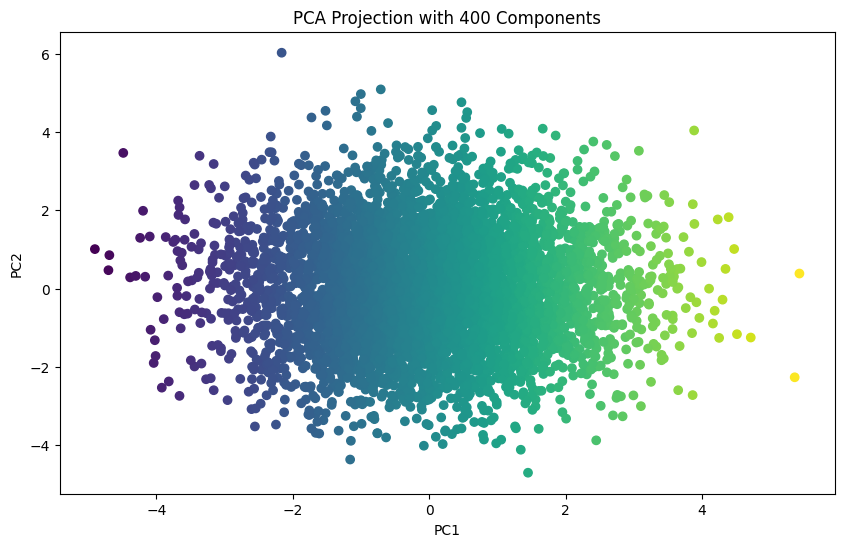


Applying PCA with 200 components...
PCA-transformed data shape with 200 components: (5000, 200)
Time taken for reduction: 2.1384 seconds
PCA reconstruction MSE with 200 components: 0.676583406222153


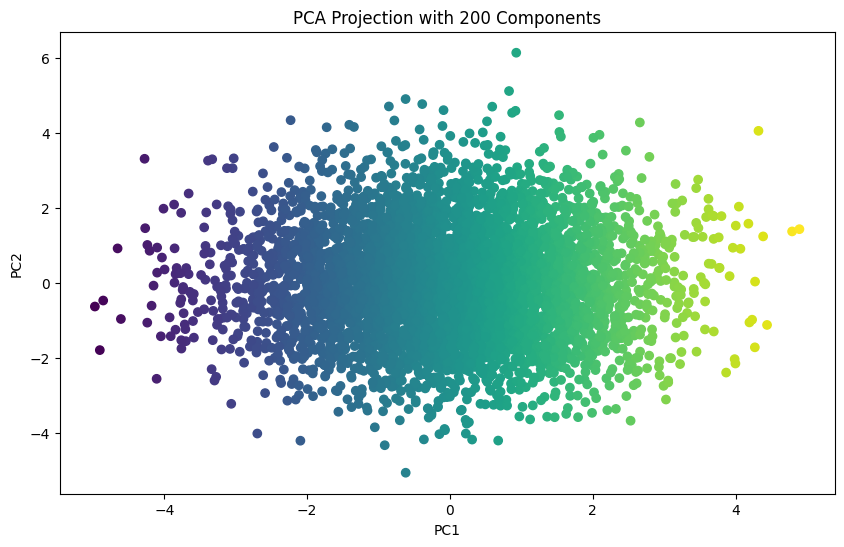


Applying PCA with 100 components...
PCA-transformed data shape with 100 components: (5000, 100)
Time taken for reduction: 3.2751 seconds
PCA reconstruction MSE with 100 components: 0.8278508060207762


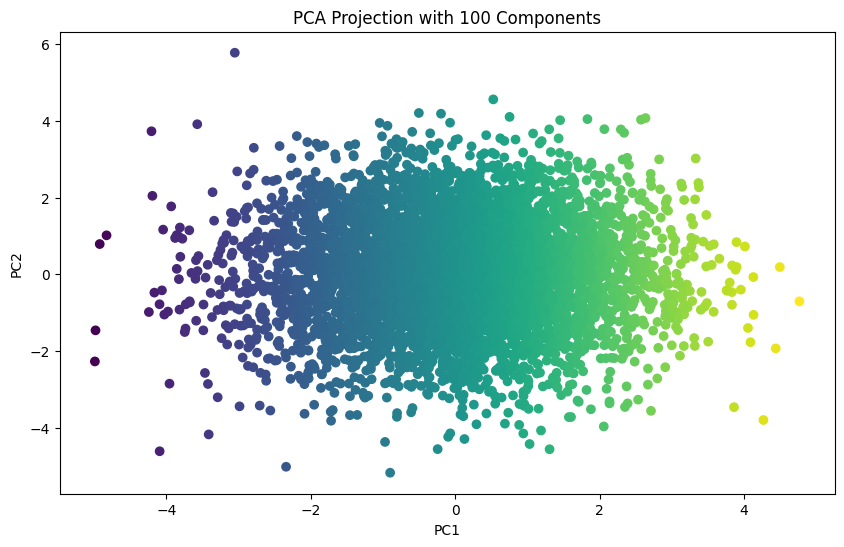

In [ ]:
# Apply PCA and calculate MSE for reduced components

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import time


n_components_list = [1000, 800, 600, 400, 200, 100]

for n_components in n_components_list:
    print(f"\nApplying PCA with {n_components} components...")
    pca = PCA(n_components=n_components)

    start_time = time.time()
    X_pca = pca.fit_transform(X_scaled)
    end_time = time.time()
    time_taken = end_time - start_time

    print(f"PCA-transformed data shape with {n_components} components: {X_pca.shape}")
    print(f"Time taken for reduction: {time_taken:.4f} seconds")


    X_pca_reconstructed = pca.inverse_transform(X_pca)


    mse_pca = mean_squared_error(X_scaled, X_pca_reconstructed)
    print(f"PCA reconstruction MSE with {n_components} components: {mse_pca}")


    if X_pca.shape[1] >= 2:
        plt.figure(figsize=(10, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], cmap='viridis')
        plt.title(f"PCA Projection with {n_components} Components")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.show()
    else:
         print(f"PCA projection cannot be plotted as the number of components is less than 2 for {n_components}.")

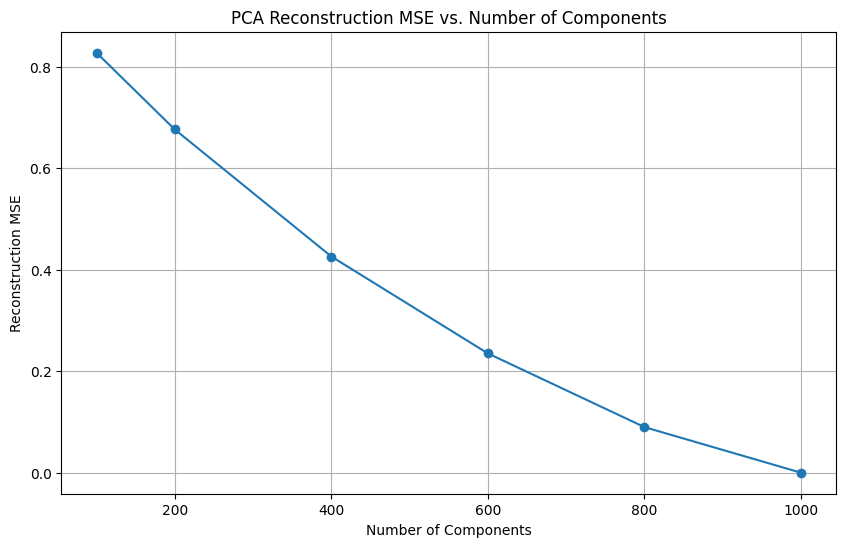

In [ ]:
import matplotlib.pyplot as plt
import re

# Extract MSE and number of components from the output of the PCA analysis cell
pca_output = """
Applying PCA with 1000 components...
PCA-transformed data shape with 1000 components: (5000, 1000)
Time taken for reduction: 2.2737 seconds
PCA reconstruction MSE with 1000 components: 1.457439380976473e-29

Applying PCA with 800 components...
PCA-transformed data shape with 800 components: (5000, 800)
Time taken for reduction: 2.3026 seconds
PCA reconstruction MSE with 800 components: 0.08989164232585568

Applying PCA with 600 components...
PCA-transformed data shape with 600 components: (5000, 600)
Time taken for reduction: 6.5417 seconds
PCA reconstruction MSE with 600 components: 0.23513338065647502

Applying PCA with 400 components...
PCA-transformed data shape with 400 components: (5000, 400)
Time taken for reduction: 3.3292 seconds
PCA reconstruction MSE with 400 components: 0.4261708024608203

Applying PCA with 200 components...
PCA-transformed data shape with 200 components: (5000, 200)
Time taken for reduction: 2.1384 seconds
PCA reconstruction MSE with 200 components: 0.676583406222153

Applying PCA with 100 components...
PCA-transformed data shape with 100 components: (5000, 100)
Time taken for reduction: 3.2751 seconds
PCA reconstruction MSE with 100 components: 0.8278508060207762
"""

mse_values = []
n_components_values = []


pattern = re.compile(r"Applying PCA with (\d+) components.*?PCA reconstruction MSE with \d+ components: ([\d.e-]+)", re.DOTALL)

matches = pattern.findall(pca_output)

for n_components_str, mse_str in matches:
    n_components_values.append(int(n_components_str))
    mse_values.append(float(mse_str))

# Sort the values by number of components
sorted_indices = sorted(range(len(n_components_values)), key=lambda i: n_components_values[i])
n_components_values = [n_components_values[i] for i in sorted_indices]
mse_values = [mse_values[i] for i in sorted_indices]


# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(n_components_values, mse_values, marker='o', linestyle='-')
plt.title("PCA Reconstruction MSE vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction MSE")
plt.grid(True)
plt.show()


Applying Kernel PCA with 1000 components...
KPCA-transformed data shape with 1000 components: (5000, 916)
Time taken for reduction: 43.8197 seconds
KPCA reconstruction MSE with 1000 components: 0.9448326210571325


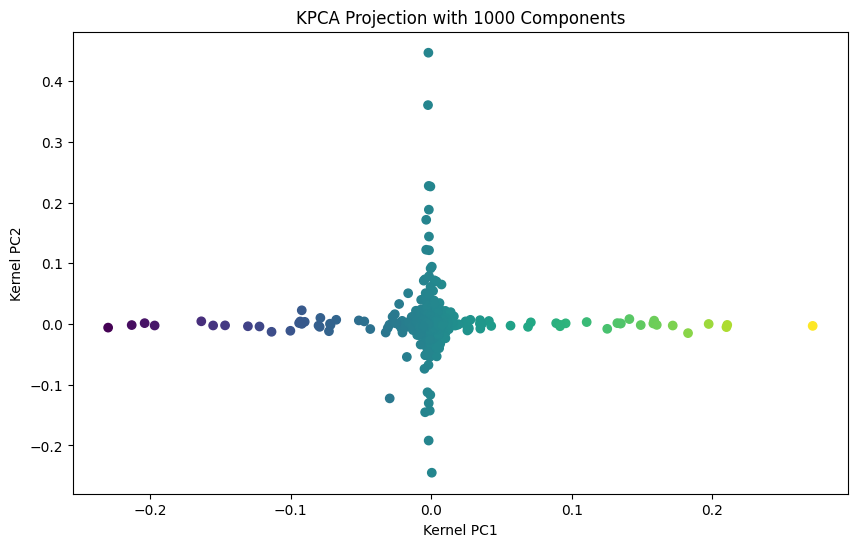


Applying Kernel PCA with 800 components...
KPCA-transformed data shape with 800 components: (5000, 741)
Time taken for reduction: 35.1560 seconds
KPCA reconstruction MSE with 800 components: 0.9553531717666127


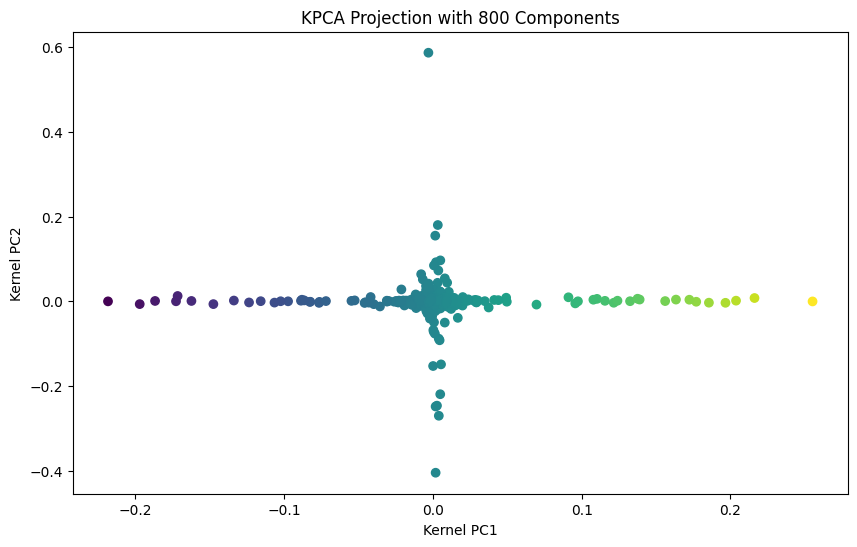


Applying Kernel PCA with 600 components...
KPCA-transformed data shape with 600 components: (5000, 535)
Time taken for reduction: 36.1203 seconds
KPCA reconstruction MSE with 600 components: 0.9677243964671061


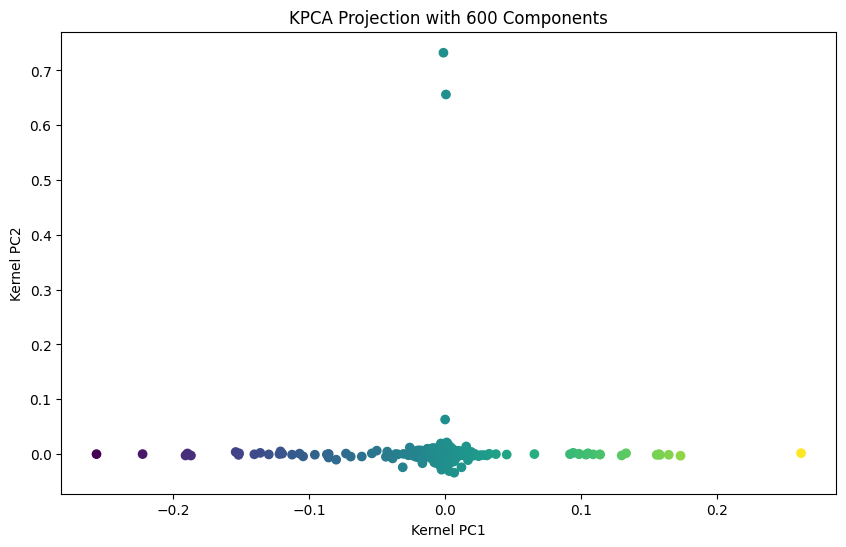


Applying Kernel PCA with 400 components...
KPCA-transformed data shape with 400 components: (5000, 326)
Time taken for reduction: 32.3938 seconds
KPCA reconstruction MSE with 400 components: 0.980320364488852


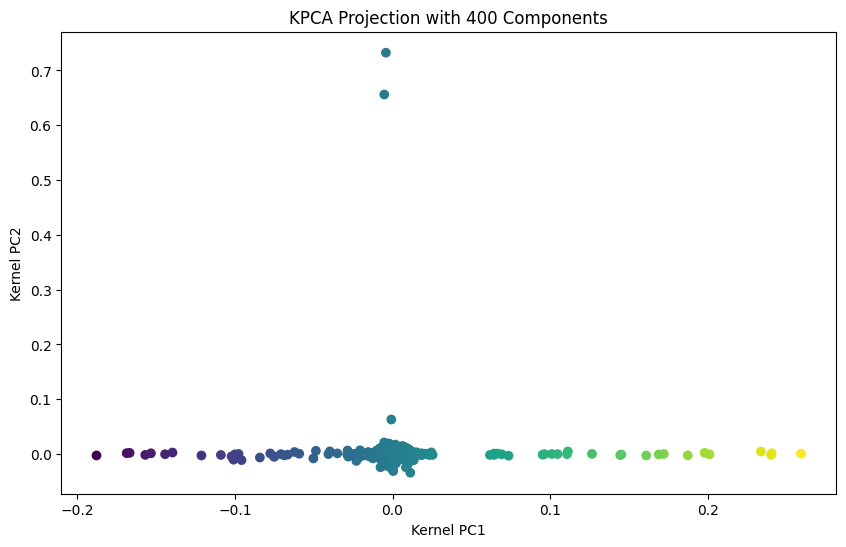


Applying Kernel PCA with 200 components...
KPCA-transformed data shape with 200 components: (5000, 154)
Time taken for reduction: 30.6863 seconds
KPCA reconstruction MSE with 200 components: 0.9907265475939246


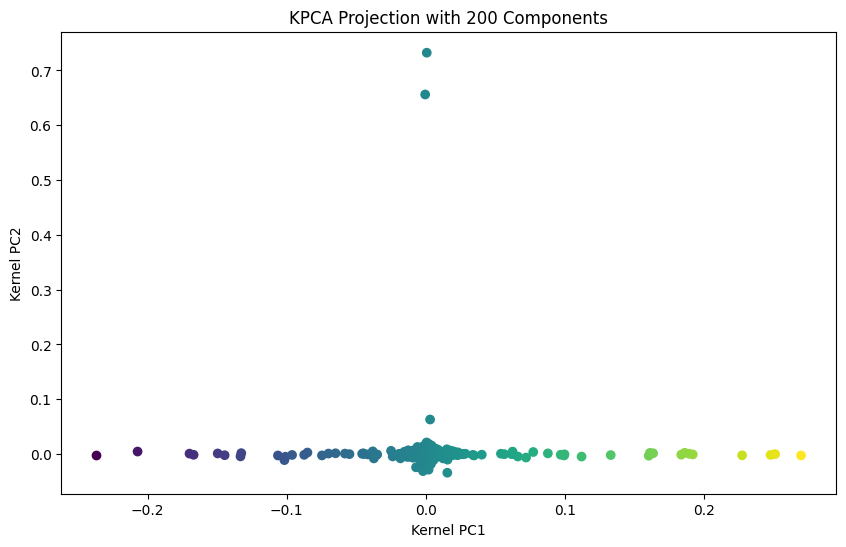


Applying Kernel PCA with 100 components...
KPCA-transformed data shape with 100 components: (5000, 82)
Time taken for reduction: 31.5752 seconds
KPCA reconstruction MSE with 100 components: 0.995083121933468


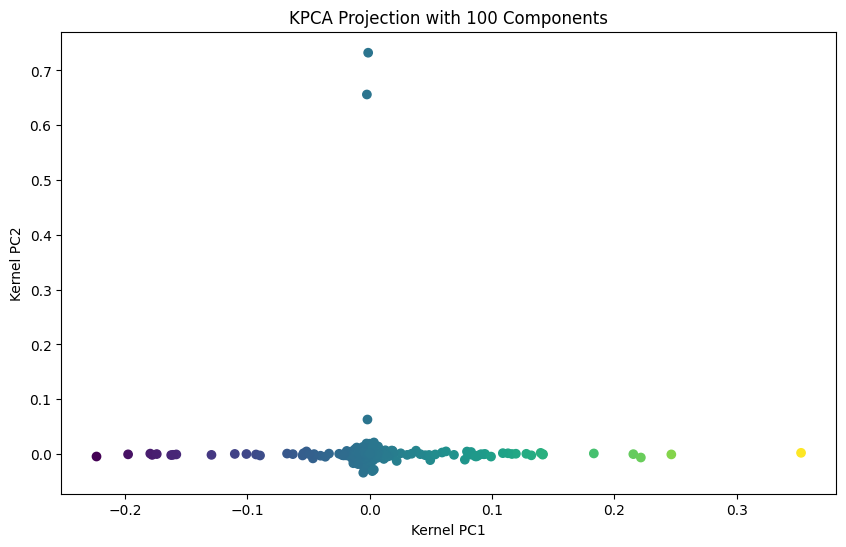

In [ ]:
# Apply Kernel PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time


n_components_list = [1000, 800, 600, 400, 200, 100]

for n_components in n_components_list:
    print(f"\nApplying Kernel PCA with {n_components} components...")
    # Apply Kernel PCA to the scaled high-dimensional data
    # Using an RBF kernel with gamma=0.1
    kpca = KernelPCA(n_components=n_components, kernel="rbf", gamma=0.1, random_state=42, fit_inverse_transform=True, remove_zero_eig=True)

    start_time = time.time()
    X_kpca = kpca.fit_transform(X_scaled)
    end_time = time.time()
    time_taken = end_time - start_time

    print(f"KPCA-transformed data shape with {n_components} components: {X_kpca.shape}")
    print(f"Time taken for reduction: {time_taken:.4f} seconds")


    X_kpca_reconstructed = kpca.inverse_transform(X_kpca)


    mse_kpca = mean_squared_error(X_scaled, X_kpca_reconstructed)
    print(f"KPCA reconstruction MSE with {n_components} components: {mse_kpca}")


    if X_kpca.shape[1] >= 2:
        plt.figure(figsize=(10, 6))
        plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=X_kpca[:, 0], cmap='viridis')
        plt.title(f"KPCA Projection with {n_components} Components")
        plt.xlabel("Kernel PC1")
        plt.ylabel("Kernel PC2")
        plt.show()
    else:
        print(f"KPCA projection cannot be plotted as the number of components is less than 2 for {n_components}.")

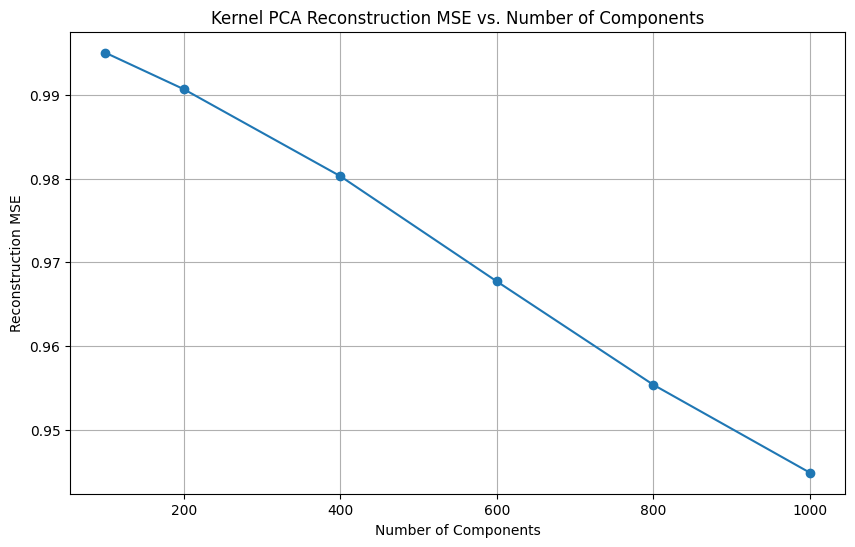

In [ ]:
import matplotlib.pyplot as plt
import re

# Extract MSE and number of components from the output of the Kernel PCA analysis cell
kpca_output = """
Applying Kernel PCA with 1000 components...
KPCA-transformed data shape with 1000 components: (5000, 916)
Time taken for reduction: 43.8197 seconds
KPCA reconstruction MSE with 1000 components: 0.9448326210571325

Applying Kernel PCA with 800 components...
KPCA-transformed data shape with 800 components: (5000, 741)
Time taken for reduction: 35.1560 seconds
KPCA reconstruction MSE with 800 components: 0.9553531717666127

Applying Kernel PCA with 600 components...
KPCA-transformed data shape with 600 components: (5000, 535)
Time taken for reduction: 36.1203 seconds
KPCA reconstruction MSE with 600 components: 0.9677243964671061

Applying Kernel PCA with 400 components...
KPCA-transformed data shape with 400 components: (5000, 326)
Time taken for reduction: 32.3938 seconds
KPCA reconstruction MSE with 400 components: 0.980320364488852

Applying Kernel PCA with 200 components...
KPCA-transformed data shape with 200 components: (5000, 154)
Time taken for reduction: 30.6863 seconds
KPCA reconstruction MSE with 200 components: 0.9907265475939246

Applying Kernel PCA with 100 components...
KPCA-transformed data shape with 100 components: (5000, 82)
Time taken for reduction: 31.5752 seconds
KPCA reconstruction MSE with 100 components: 0.995083121933468
"""

mse_values_kpca = []
n_components_values_kpca = []


pattern = re.compile(r"Applying Kernel PCA with (\d+) components.*?KPCA reconstruction MSE with \d+ components: ([\d.e-]+)", re.DOTALL)

matches = pattern.findall(kpca_output)

for n_components_str, mse_str in matches:
    n_components_values_kpca.append(int(n_components_str))
    mse_values_kpca.append(float(mse_str))

# Sort the values by number of components
sorted_indices_kpca = sorted(range(len(n_components_values_kpca)), key=lambda i: n_components_values_kpca[i])
n_components_values_kpca = [n_components_values_kpca[i] for i in sorted_indices_kpca]
mse_values_kpca = [mse_values_kpca[i] for i in sorted_indices_kpca]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(n_components_values_kpca, mse_values_kpca, marker='o', linestyle='-')
plt.title("Kernel PCA Reconstruction MSE vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction MSE")
plt.grid(True)
plt.show()